# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

Fresh          Milk       Grocery        Frozen  \
count     440.000000    440.000000    440.000000    440.000000   
mean    12000.297727   5796.265909   7951.277273   3071.931818   
std     12647.328865   7380.377175   9503.162829   4854.673333   
min         3.000000     55.000000      3.000000     25.000000   
25%      3127.750000   1533.000000   2153.000000    742.250000   
50%      8504.000000   3627.000000   4755.500000   1526.000000   
75%     16933.750000   7190.250000  10655.750000   3554.250000   
max    112151.000000  73498.000000  92780.000000  60869.000000   

       Detergents_Paper  Delicatessen  
count        440.000000    440.000000  
mean        2881.493182   1524.870455  
std         4767.854448   2820.105937  
min            3.000000      3.000000  
25%          256.750000    408.250000  
50%          816.500000    965.500000  
75%         3922.000000   1820.250000  
max        40827.000000  47943.000000

### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [3]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [25,180,320] 

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  16165  4230     7595     201              4003            57
1  12356  6036     8887     402              1382          2794
2   1774  3696     2280     514               275           834

In [4]:
data.sum(axis=0)

Fresh               5280131
Milk                2550357
Grocery             3498562
Frozen              1351650
Detergents_Paper    1267857
Delicatessen         670943
dtype: int64

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:

Based on the sample data.  Sample 1 seems like a supermarket - high dollar value is spent on Fresh, Grocery, Milk and Detergents_paper. Sample 2 also seems to be a supermarket.  Sample 3 seems like a restaurant, low dollar value is spent on fresh, milk, grocery,frozen. 

**

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [5]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
#Fresh               
#Milk                
#Grocery             
#Frozen              
#Detergents_Paper    
#Delicatessen 


#Drop Fresh
new_data=data.copy()
Y = new_data['Delicatessen']
new_data.drop('Delicatessen',axis=1,inplace=True)


# TODO: Split the data into training and testing sets using the given feature as the target
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor

#Y = data.drop(['Grocery','Milk','Frozen','Detergents_Paper','Delicatessen'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(new_data, Y, test_size=0.25, random_state=42)

# TODO: Create a decision tree regressor and fit it to the training set
from sklearn import tree
clf = DecisionTreeRegressor(random_state = 42)
regressor = clf.fit(X_train,y_train)


# TODO: Report the score of the prediction using the testing set
score = clf.score(X_test,y_test)
print score


-2.2547115372


In [ ]:
Fresh score = -.3857
Milk score = .1562
Grocery = .68188
Frozen = -.2101
Detergetns_Paper = .2716
Delicatessen = -2.25

### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer: Attempted to predict all features.  Below is the reported score 

Fresh  = -.3857
Milk = .1562
Grocery = .68188
Frozen = -.2101
Detergetns_Paper = .2716
Delicatessen = -2.25

The higher the R^2 the higher the correlation with all features and the less important it is for understanding the customer's spending habits.  For example Grocery has an R^2 of .68, that will tell nothing on the cutomer's spending habits because it implies that the more you spend on other categories the more you are going to spend on grocery. However delicatessen has a -2.25 score, that can give some insight on customer spending.  This implies that the higher the amount is spent on other categories the less is spent on delicatessen.  

**

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

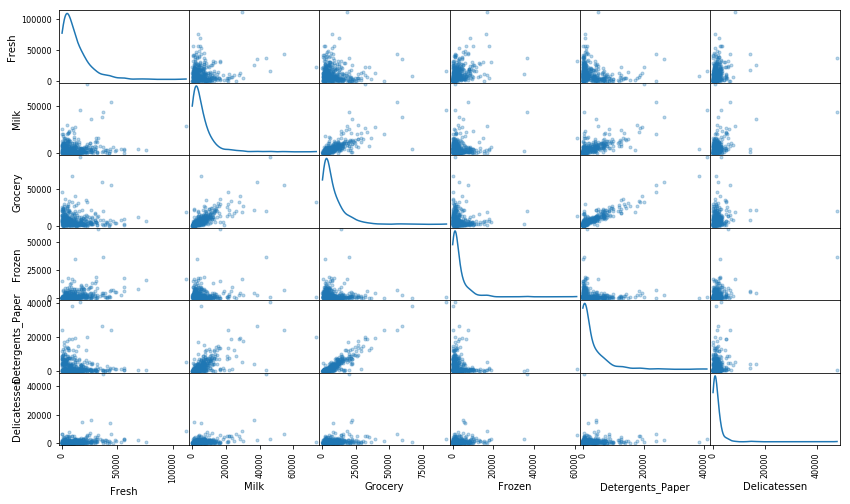

In [6]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer: Yes, Grocery and Milk exhibit a high degree of positive correlation; Grocery and Detergents_paper exhibit a high degree of positive correlation; 

This does confirm my suspicion on the relevance of the feature.   The data for these features are right skewed as their mean is greater than the median**



In [7]:
display(data.mean())
display(data.median())

Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicatessen         1524.870455
dtype: float64

Fresh               8504.0
Milk                3627.0
Grocery             4755.5
Frozen              1526.0
Detergents_Paper     816.5
Delicatessen         965.5
dtype: float64

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

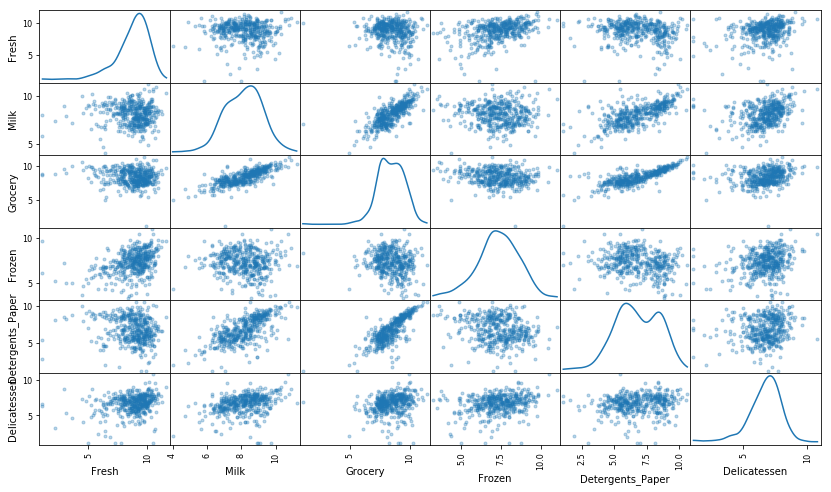

In [8]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data.copy())


# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples.copy())

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [9]:
# Display the log-transformed sample data
display(log_samples)

display(samples)

Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
0  9.690604  8.349957  8.935245  5.303305          8.294799      4.043051
1  9.421897  8.705497  9.092345  5.996452          7.231287      7.935230
2  7.480992  8.215006  7.731931  6.242223          5.616771      6.726233

Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  16165  4230     7595     201              4003            57
1  12356  6036     8887     402              1382          2794
2   1774  3696     2280     514               275           834

### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [10]:
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data['Delicatessen'],25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data['Delicatessen'],75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3-Q1)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = [65,66,75,128,154]

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


Fresh       Milk    Grocery     Frozen  Detergents_Paper  \
4    10.026369   8.596004   8.881558   8.272571          7.482682   
12   10.364514   9.418898   9.372204   5.659482          8.263848   
13    9.962558   8.733594   9.614605   8.037543          8.810907   
14   10.112654   9.155356   9.400217   5.683580          8.528726   
18    9.830971   8.752581   9.220192   7.698483          7.925519   
20    9.772581   8.416046   8.434246   6.971669          7.722678   
22   10.350606   7.558517   8.404920   9.149316          7.775276   
23   10.180096  10.502956   9.999661   8.547528          8.374938   
24   10.027783   9.187686   9.531844   7.977625          8.407825   
29   10.671000   7.649693   7.866722   7.090077          7.009409   
30    9.842410   8.191463   9.315331   7.045777          7.665753   
32    9.981929   7.183871   7.967627   5.583496          6.822197   
33   10.299878   8.473450   8.899185   8.720950          5.888878   
36   10.307452   8.380686   8.599326   7.455298          6.759255   
39   10.935942   6.318968   6.804615   9.210540          5.356586   
40   10.086850   8.373785   8.467372   9.160099          7.043160   
41    9.861415   8.027803   8.692154   7.617268          7.853605   
47   10.702480  10.901524  10.925417   8.959569         10.092909   
52   10.614499   8.272826   8.678632   6.276643          7.858254   
54   10.215704   7.278629   7.574045   7.798113          5.318120   
61   10.489662  10.555005  10.995377   8.087640         10.192456   
66    2.197225   7.335634   8.911530   5.164786          8.151333   
67    9.899128   8.818630   9.507626   7.135687          8.545003   
71    9.814164   7.143618   9.954276   8.589142          8.336390   
73    9.898425   8.581482   9.072571   9.003562          6.638568   
75    9.923192   7.036148   1.098612   8.390949          1.098612   
83    9.946260   7.354362   7.486053   7.749322          6.309918   
86   10.039983  11.205013  10.377047   6.894670          9.906981   
87   10.675099   8.522181   9.001716   8.750208          7.364547   
89   10.122784   8.252185   8.581107   8.144098          6.118097   
..         ...        ...        ...        ...               ...   
311  10.296711   7.755767   9.021598   8.021585          5.916202   
324  10.164967   8.185071   7.809541   7.770223          4.941642   
325  10.395650   9.728181   9.519735  11.016479          7.148346   
332  10.013283   8.075894   7.277248   7.699842          5.181784   
335  10.206625   8.827175   9.286375   7.218910          8.321422   
338   1.098612   5.808142   8.856661   9.655090          2.708050   
347  10.217568   8.879612   9.418248   7.940584          8.438366   
356  10.029503   4.897840   5.384495   8.057377          2.197225   
357   3.610918   7.150701  10.011086   4.919981          8.816853   
360   9.890706   7.962764   7.603898   7.863651          6.148468   
368  10.013910   7.086738   7.785721   7.623642          4.615121   
370  10.588577   8.279951   8.508152   7.218177          6.259581   
371   9.908724   7.542744   7.569928   9.007490          6.573680   
377  10.565995   8.056427   7.881560   6.941190          4.564348   
380  10.249096   6.850126   7.671361   8.263848          6.396930   
381   9.785267   8.431853   7.388328   9.203014          5.505332   
382  10.447380   8.913954   9.044168   7.839919          7.444833   
387   9.948365   7.557995   7.360740   7.580700          5.442418   
393  10.070357   8.814330   8.253748   9.061840          5.953243   
401  10.209758   7.937732   7.662938   9.489713          4.521789   
402  10.186371   8.466531   8.535230   5.393628          2.302585   
403  10.150582   9.306196   8.434681   4.844187          6.448889   
404   9.802174   8.436634   8.144389   8.371936          6.817831   
406  10.129268   8.519191   8.522380   9.190750          6.995766   
422  10.181119   7.227662   8.336151   6.721426          6.854355   
423   9.773664   8.212297   8.446127   6.965080          7.497207   
427  10

Data points considered outliers for the feature 'Milk':


Fresh       Milk    Grocery     Frozen  Detergents_Paper  \
23   10.180096  10.502956   9.999661   8.547528          8.374938   
28    8.321908   9.927399  10.164197   7.054450          9.059982   
45    8.552753  10.000796   9.977249   7.461640          8.902864   
47   10.702480  10.901524  10.925417   8.959569         10.092909   
49    8.510571   9.971707  10.272323   7.494430          9.516574   
56    8.318254  10.305346  10.198617   7.869402          9.783577   
61   10.489662  10.555005  10.995377   8.087640         10.192456   
65    4.442651   9.950323  10.732651   3.583519         10.095388   
85    9.687630  10.740670  11.437986   6.933423         10.617099   
86   10.039983  11.205013  10.377047   6.894670          9.906981   
92    9.126741  10.220923  10.374553   8.080856          9.847235   
171   5.298317  10.160530   9.894245   6.478510          9.079434   
181  11.627601  10.296441   9.806316   9.725855          8.506739   
183  10.514529  10.690808   9.911952  10.505999          5.476464   
211   9.402530  10.251535  10.588955   8.462948          9.873544   
251   8.721602  10.049015  10.421865   8.816705          9.830594   
254   9.247540   9.796570   8.465479   8.452335          7.344073   
265   8.684232  10.065904   9.525078   9.225721          6.721426   
309   6.822197   9.935713   9.515396   7.289611          8.831420   
319   9.185945  10.129467   9.778208   7.028201          9.426097   
358   6.632002   9.834352   7.414573   8.718337          6.284134   
384   9.276409   9.992322   9.642123   8.198364          5.641907   

     Delicatessen  
23       9.712509  
28       8.557567  
45       8.514189  
47       8.774158  
49       7.058758  
56       7.200425  
61       7.609367  
65       7.260523  
85       7.987524  
86       6.805723  
92       8.542861  
171      8.740337  
181      9.053687  
183     10.777768  
211      7.962067  
251      8.541105  
254      8.091015  
265      8.198639  
309      6.692084  
319      7.393263  
358      8.318742  
384      8.540910

Data points considered outliers for the feature 'Grocery':


Fresh       Milk    Grocery     Frozen  Detergents_Paper  \
9     8.700514   9.314070   9.845911   7.055313          8.912608   
23   10.180096  10.502956   9.999661   8.547528          8.374938   
28    8.321908   9.927399  10.164197   7.054450          9.059982   
43    6.445720   9.314250  10.085726   6.668228          9.162095   
45    8.552753  10.000796   9.977249   7.461640          8.902864   
46    8.040125   9.551729   9.996750   7.419381          8.823501   
47   10.702480  10.901524  10.925417   8.959569         10.092909   
49    8.510571   9.971707  10.272323   7.494430          9.516574   
56    8.318254  10.305346  10.198617   7.869402          9.783577   
61   10.489662  10.555005  10.995377   8.087640         10.192456   
65    4.442651   9.950323  10.732651   3.583519         10.095388   
71    9.814164   7.143618   9.954276   8.589142          8.336390   
75    9.923192   7.036148   1.098612   8.390949          1.098612   
77    9.409601   9.449121  10.259062   6.767343          9.395491   
85    9.687630  10.740670  11.437986   6.933423         10.617099   
86   10.039983  11.205013  10.377047   6.894670          9.906981   
92    9.126741  10.220923  10.374553   8.080856          9.847235   
109   7.248504   9.724899  10.274568   6.511745          6.728629   
111   9.439784   9.315961   9.773891   6.690842          8.772920   
145  10.000569   9.034080  10.457143   3.737670          9.440738   
155   7.595387   9.277064   9.876116   5.451038          9.356776   
163   8.618124   9.663071  10.198766   7.769379          9.527047   
165   9.655987   9.445650   9.896362   8.395026          8.868976   
171   5.298317  10.160530   9.894245   6.478510          9.079434   
173   6.242223   8.945984   9.893690   6.842683          9.193804   
181  11.627601  10.296441   9.806316   9.725855          8.506739   
183  10.514529  10.690808   9.911952  10.505999          5.476464   
193   5.192957   8.156223   9.917982   6.865891          8.633731   
200   8.028455   9.490998  10.048756   8.279190          9.206232   
201   8.408271   9.574914  10.114882   8.174421          9.563459   
205   7.009409   9.368284  10.068832   6.861711          9.133999   
211   9.402530  10.251535  10.588955   8.462948          9.873544   
216   7.836765   9.717098  10.504684   5.187386          9.496121   
251   8.721602  10.049015  10.421865   8.816705          9.830594   
266   6.349139   9.186355  10.007036   7.705713          8.493310   
268   9.384966   8.993800   9.895808   6.974479          8.759982   
301   8.572249   9.496722   9.923241   7.500529          9.077038   
304   5.081404   8.917311  10.117510   6.424869          9.374413   
306   8.774622   9.462421   9.979059   7.517521          8.930362   
312   7.667158   8.226038   9.861206   7.149917          9.748003   
319   9.185945  10.129467   9.778208   7.028201          9.426097   
331   9.325721   9.607841  10.197611   7.118016          9.170143   
333   9.055439   8.513185  11.116886   4.875197         10.548022   
343   7.431892   8.848509  10.177932   7.283448          9.646593   
349   8.696343   9.591581   9.929204   7.603399          9.410666   
351   7.098376   9.214731  10.012073   7.462215          9.444463   
353   4.762174   8.742574   9.961898   5.429346          9.069007   
357   3.610918   7.150701  10.011086   4.919981          8.816853   
407   8.904087   9.460632   9.835369   7.956477          8.972464   
418   6.492240   9.047115   9.832099   4.890349          8.815815   
437   9.584040   9.647821  10.317020   6.079933          9.605149   

     Delicatessen  
9        7.648740  
23       9.712509  
28       8.557567  
43       4.276666  
45       8.514189  
46       7.280697  
47       8.774158  
49       7.058758  
56       7.200425  
61       7.609367  
65       7.260523  
71       9.579971  
75       6.882437  
77       6.916715  
85       7.987524  
86       6.805723  
92       8.542861  
109      1.098612  
111      7.325808  
145      8.396155  


Data points considered outliers for the feature 'Frozen':


Fresh       Milk    Grocery     Frozen  Detergents_Paper  \
38    8.431853   9.663261   9.723703   3.496508          8.847360   
57    8.597297   9.203618   9.257892   3.637586          8.932213   
65    4.442651   9.950323  10.732651   3.583519         10.095388   
93    9.333796   8.035926   7.631432  10.463360          4.262680   
103  10.934570   8.161660   9.094480   9.799681          7.299797   
145  10.000569   9.034080  10.457143   3.737670          9.440738   
183  10.514529  10.690808   9.911952  10.505999          5.476464   
196  10.329539   8.883086   8.496378   9.836867          6.637258   
325  10.395650   9.728181   9.519735  11.016479          7.148346   
413   8.513787   8.488588   8.799812   9.790655          6.815640   
420   8.402007   8.569026   9.490015   3.218876          8.827321   

     Delicatessen  
38       6.070738  
57       7.156177  
65       7.260523  
93       7.900266  
103      7.823246  
145      8.396155  
183     10.777768  
196      7.964156  
325      8.632128  
413      7.797702  
420      7.239215

Data points considered outliers for the feature 'Detergents_Paper':


Fresh       Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
47   10.702480  10.901524  10.925417  8.959569         10.092909      8.774158
56    8.318254  10.305346  10.198617  7.869402          9.783577      7.200425
61   10.489662  10.555005  10.995377  8.087640         10.192456      7.609367
65    4.442651   9.950323  10.732651  3.583519         10.095388      7.260523
75    9.923192   7.036148   1.098612  8.390949          1.098612      6.882437
85    9.687630  10.740670  11.437986  6.933423         10.617099      7.987524
86   10.039983  11.205013  10.377047  6.894670          9.906981      6.805723
92    9.126741  10.220923  10.374553  8.080856          9.847235      8.542861
122   9.410174   5.303305   5.501258  7.596392          3.218876      6.756932
142  10.519646   8.875147   9.018332  8.004700          2.995732      1.098612
154   6.432940   4.007333   4.919981  4.317488          1.945910      2.079442
161   9.428190   6.291569   5.645447  6.995766          1.098612      7.711101
177   9.453992   8.899731   8.419139  7.468513          2.995732      7.875119
191   9.519588   5.686975   7.230563  6.791221          3.761200      4.430817
204   7.578657   6.792344   8.561401  7.232010          1.609438      7.191429
211   9.402530  10.251535  10.588955  8.462948          9.873544      7.962067
237   9.835851   8.252707   6.385194  8.441176          3.332205      7.102499
251   8.721602  10.049015  10.421865  8.816705          9.830594      8.541105
289  10.663966   5.655992   6.154858  7.235619          3.465736      3.091042
333   9.055439   8.513185  11.116886  4.875197         10.548022      7.102499
338   1.098612   5.808142   8.856661  9.655090          2.708050      6.309918
356  10.029503   4.897840   5.384495  8.057377          2.197225      6.306275
369   8.734077   5.820083   6.526495  6.993015          3.713572      5.690359
402  10.186371   8.466531   8.535230  5.393628          2.302585      5.828946

Data points considered outliers for the feature 'Delicatessen':


Fresh       Milk    Grocery     Frozen  Detergents_Paper  \
66    2.197225   7.335634   8.911530   5.164786          8.151333   
109   7.248504   9.724899  10.274568   6.511745          6.728629   
128   4.941642   9.087834   8.248791   4.955827          6.967909   
137   8.034955   8.997147   9.021840   6.493754          6.580639   
142  10.519646   8.875147   9.018332   8.004700          2.995732   
154   6.432940   4.007333   4.919981   4.317488          1.945910   
183  10.514529  10.690808   9.911952  10.505999          5.476464   
184   5.789960   6.822197   8.457443   4.304065          5.811141   
187   7.798933   8.987447   9.192075   8.743372          8.148735   
203   6.368187   6.529419   7.703459   6.150603          6.860664   
233   6.871091   8.513988   8.106515   6.842683          6.013715   
285  10.602965   6.461468   8.188689   6.948897          6.077642   
289  10.663966   5.655992   6.154858   7.235619          3.465736   
343   7.431892   8.848509  10.177932   7.283448          9.646593   

     Delicatessen  
66       3.295837  
109      1.098612  
128      1.098612  
137      3.583519  
142      1.098612  
154      2.079442  
183     10.777768  
184      2.397895  
187      1.098612  
203      2.890372  
233      1.945910  
285      2.890372  
289      3.091042  
343      3.610918

### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer: 

5 data points were removed because they are outliers for more than one feature 

65,66,75,128,154

I am removing these outliers as they could skew the results. 

**

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

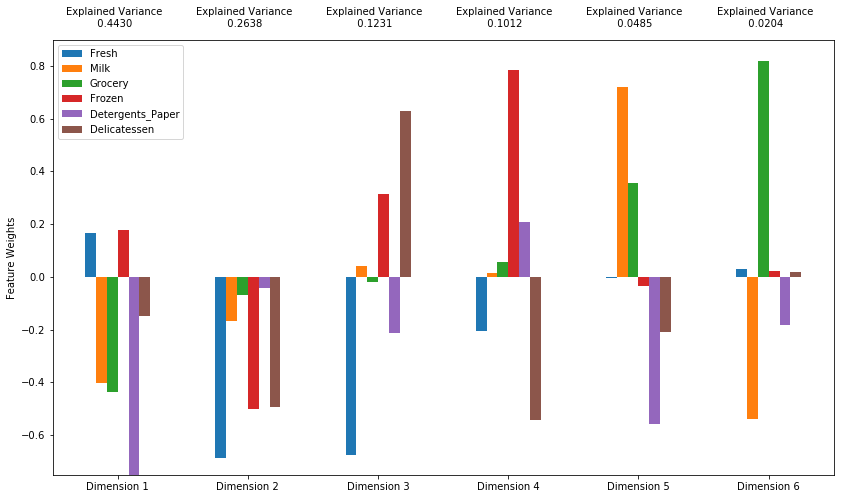

In [11]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA

pca = PCA(n_components=6).fit(good_data)


# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:

The first and second principal component explains 70% of variance. The first four explains 93% of the variance. 

Dimension 1
There is significant negative weights on Detergents_Paper, Grocery and milk.  This best represents in terms of customer spending for first dimension.

Dimension 2
There is significant negative weights on Fresh,Frozen and Delicatessen.  This best represents in terms of customer spending for second dimension

Dimension 3
There is significant positive weights on Delicatessen and Frozen. Significant negative weights on Fresh. This best represents in terms of customer spending for third dimension

Dimension 4
There is significant positive weights on Frozen and negative weights on Delicatessen.  This best represents in terms of customer spending for forth dimension

**

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [12]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

Dimension 1  Dimension 2  Dimension 3  Dimension 4  Dimension 5  \
0      -1.2292       1.5540      -3.2462       0.0043       0.1124   
1      -1.1464      -0.5574      -0.1630      -1.7168       0.1811   
2       0.7597       1.4951       0.8179      -0.8920       0.4959   

   Dimension 6  
0      -0.0697  
1       0.1444  
2      -0.4879

### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [13]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [14]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

Dimension 1  Dimension 2
0      -1.2292       1.5540
1      -1.1464      -0.5574
2       0.7597       1.4951

## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

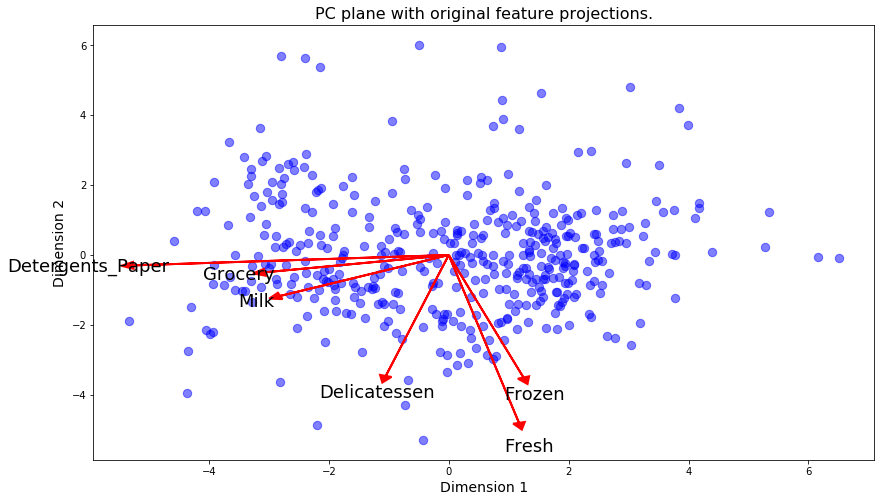

In [15]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

Detergents_Paper,Grocery, Milk are associated with the first component. Delicatessen, Frozen and Fresh are strongly correlated with the second component.  These obervations agree with the pca_results from the earlier plots.  

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:

K-Means
1. K-mean is computationally faster to execute
2. Easy to interpret the clustering results
3. It gives the best results when data set are well separated from each other

Gaussian Mixture Model
1. In GMM a point belongs to each cluster to different degree, i.e the degree indicates how likely it belongs to the cluster
2. Does not assume cluster to be in spherical form 

For this problem I prefer to use the Gaussian Mixture Model.  I have observed some level of coveriance amoung data points and  K-mean will not be able to detect that.  However, K-mean is less complex and easy to execute.  I would prefer to run both and observe the results.  

**

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [16]:
from sklearn.mixture import GaussianMixture

bic = np.zeros(9)
n = np.arange(1,10)
models = []
#loop through each number of Gaussians and compute the BIC, and save the model
for i,j in enumerate(n):
    #create mixture model with j components
    gmm = GaussianMixture(n_components=j)
    #fit it to the data
    gmm.fit(reduced_data)
    #compute the BIC for this model
    bic[i] = gmm.bic(reduced_data)
    #add the best-fit model with j components to the list of models
    models.append(gmm)

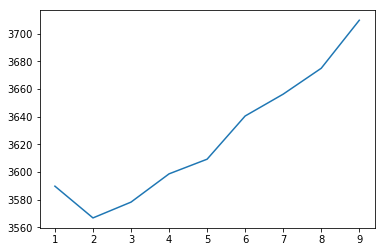

In [17]:
import matplotlib.pyplot as plt
plt.plot(n,bic)

In [18]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
clusterer = GaussianMixture(n_components=2).fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.means_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen

from sklearn.metrics import silhouette_score
score = silhouette_score(reduced_data,preds)

score

0.42232468264593881

In [ ]:
silhouette_score with 2 cluster = .42191
silhouette_score with 3 cluster = .4042
silhouette_score with 4 cluster = .30493
silhouette_score with 5 cluster = .34189
silhouette_score with 6 cluster = .34155
silhouette_score with 7 cluster = .33066
silhouette_score with 8 cluster = .31242
silhouette_score with 9 cluster = .31051
silhouette_score with 10 cluster = .31808

### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer: Below is the score for several culster number I tried.  Silhouetter_score with 2 cluster has the best score, the score kept dropping as the number of cluster increased hence I stopped at 10. 

silhouette_score with 2 cluster = .42191
silhouette_score with 3 cluster = .4042
silhouette_score with 4 cluster = .30493
silhouette_score with 5 cluster = .34189
silhouette_score with 6 cluster = .34155
silhouette_score with 7 cluster = .33066
silhouette_score with 8 cluster = .31242
silhouette_score with 9 cluster = .31051
silhouette_score with 10 cluster = .31808
**

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

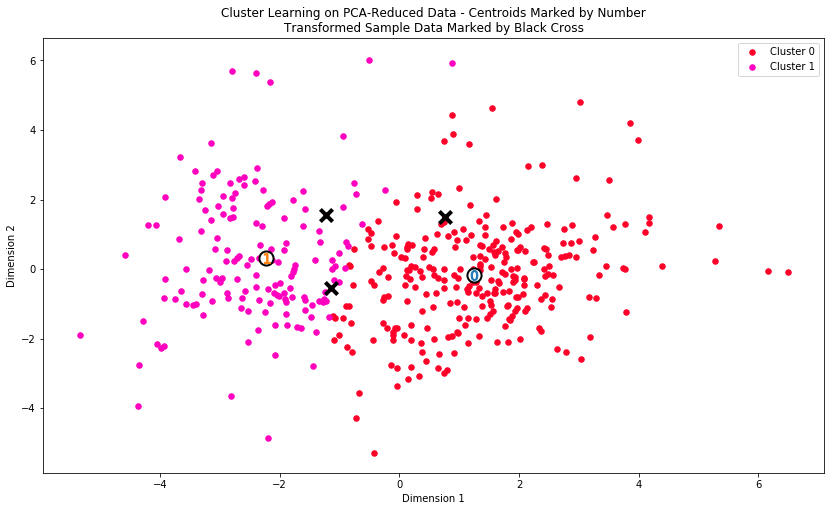

In [22]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [23]:
# TODO: Inverse transform the centers
from sklearn.decomposition import PCA
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)
display(data.describe())


Fresh    Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
Segment 0  8939.0  2108.0   2758.0  2073.0             352.0         730.0
Segment 1  3567.0  7860.0  12249.0   873.0            4713.0         966.0

Fresh          Milk       Grocery        Frozen  \
count     440.000000    440.000000    440.000000    440.000000   
mean    12000.297727   5796.265909   7951.277273   3071.931818   
std     12647.328865   7380.377175   9503.162829   4854.673333   
min         3.000000     55.000000      3.000000     25.000000   
25%      3127.750000   1533.000000   2153.000000    742.250000   
50%      8504.000000   3627.000000   4755.500000   1526.000000   
75%     16933.750000   7190.250000  10655.750000   3554.250000   
max    112151.000000  73498.000000  92780.000000  60869.000000   

       Detergents_Paper  Delicatessen  
count        440.000000    440.000000  
mean        2881.493182   1524.870455  
std         4767.854448   2820.105937  
min            3.000000      3.000000  
25%          256.750000    408.250000  
50%          816.500000    965.500000  
75%         3922.000000   1820.250000  
max        40827.000000  47943.000000

### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:

Segment 1 has higher than the mean spending on Milk,Grocery, Detergents.  Customer assigned to Segment 1 are supermarket or grocery store

Segment 0 - Customer assigned to segment 0 are restaurants or cafes, because low dollar value spent on most categories except Fresh. 
**

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [24]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 0


**Answer:

Cusotmer 1 and 2 are predicted to be in Cluster 1 (Supermarket/ grocery store)

Customer 3 is predicted to be in Cluster 0 (Restaurant/ Cafe)

My guesses in the beginning of the project about the segment for each customer are in line with the predictions.

**

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:

Group of customers that rely on fresh produce can get affected. There can be positive and negative effects.  For instance  Customer that need fresh produce usually order quantity based on demand, storage space and seasons.  It would be more costly for them to stock more quanity and require more upfront investment. On the other hand customers that are equiped with more storgae space and who can properly handle fresh produce will prefer to reduce the delivery service as they can save the extra delivery cost.  

Its difficult to conduct A/B test because its hard to confirm if two customers are exactly the same.  But its more likely that customer that consume fresh produce would prefer to not change the delivery service. 

**

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:  The new data points can be added to the customer segment data and the clustering algorithms such as K-Means or Gaussian Mixture model and PCA can be re-run to predict the segment. 

The target variables will be the customer labels or segments. 




**

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

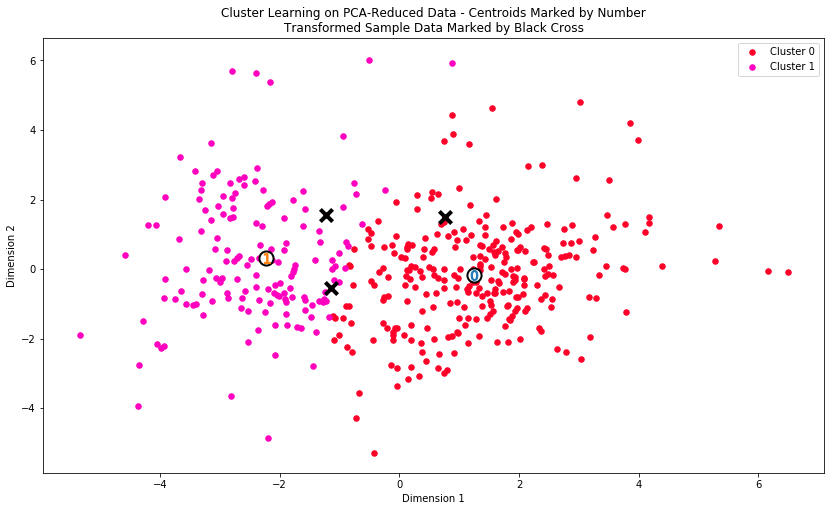

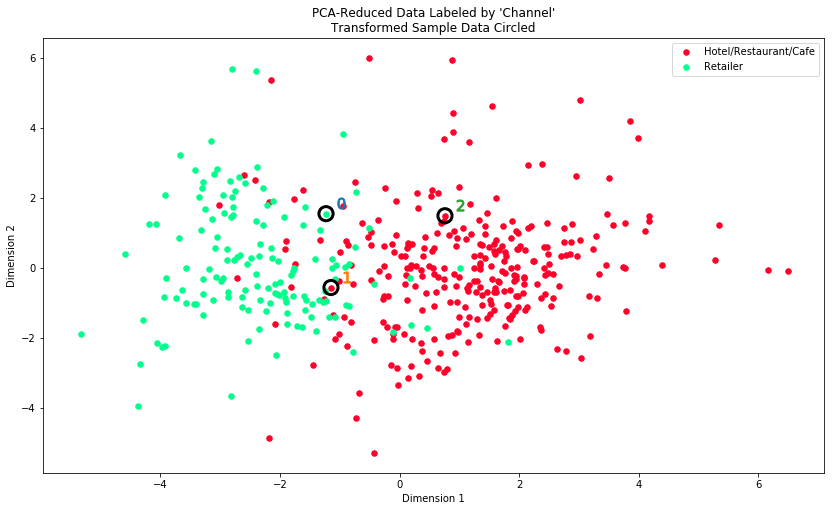

In [26]:
# Display the clustering results based on 'Channel' data

vs.cluster_results(reduced_data, preds, centers, pca_samples)
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:   

clustering algorithm and number of clusters are consistent with the underlying distribution. The customer segments that are classified as purely "Retailers" or "Hotels/"Restaurants/Cafes" on the left and on the right side accordingly.


However, the classification is not consistent with the previous definition of the customer segments.  

**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.